In [156]:
# I would be using the following libraries to work on the project. 
# Pandas mainly for analysis, seaborn & matplotlib for visualization purposes.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import datetime

In [3]:
# let us import the two csv files & create a object
data_p = pd.read_csv("exercise_providers.csv")
data_j = pd.read_csv("exercise_jobs.csv")

# Creating a dataframe using pandas DataFrame tool

df_provider = pd.DataFrame(data_p)
df_jobs = pd.DataFrame(data_j)




In [40]:

#let us get a quick glimse of our provider data set
df_provider.head()

,provider_id,city,sign_up_date,first_call_date,went_live_date
0,0007252cf8a0fdc33b21dfa6edd065b7,Hamburg,3/10/2017 11:29 PM,(missing),NaN
1,000b8c0a87c026d300aea7548fea41b3,Munich,3/28/2017 07:51 PM,4/3/2017 06:07 AM,NaN
2,001457235f1ea968c33f461716e0535a,Munster,2/28/2017 09:46 AM,3/1/2017 07:58 PM,3/8/2017 09:44 AM
3,001acc15a33ba3771d5f2aaf9e9c354c,Hamburg,2/1/2017 11:14 AM,NaN,NaN
4,0024bbea61ac3d66ccd737be31c29422,Hamburg,2/9/2017 11:34 PM,2/26/2017 12:00 AM,3/22/2017 11:14 AM


In [41]:
# let us also see how our jobs data set looks like

df_jobs.head()

,provider_id,job_id,job_appointment_time
0,2bdea6fa14f89e7029a40bbbef898bab,5c0cab48e449967ad41eeb08744a7ca9,4/1/2017 05:58 AM
1,405ab0f875cecac6576d0d70d1d33227,f01fb12ce381c2001dd937332f6cdf5a,3/10/2017 09:37 PM
2,6b4768b4fcf385b59f7c465c10acf357,56309569c0bcc679c830fe77b7dcf036,3/29/2017 07:02 AM
3,ed2dec9c40884e9afff5b2ac258908ac,46de8ad38ea647ac274b9a4920efdd7c,2/26/2017 10:08 PM
4,178a3b6b864943c790b3af765076dd3f,ec44335fd0e34f57caa819deb1d7c126,5/12/2017 05:07 PM


In [42]:
# let us also get a whole picture of the provider data set
# We see that we have 9878 unique provider_id

df_provider.describe()


,provider_id,city,sign_up_date,first_call_date,went_live_date
count,9878,9878,9878,8170,7180
unique,9878,5,9503,6767,6934
top,7b5a47167de9a9fe2c629a7921c3268d,Munich,3/25/2017 11:12 PM,##############################################...,0001-01-01 00:00:00
freq,1,2032,3,798,101


In [43]:
# let us also get a whole picture of the job data set
# We have 6126 unique provider_id in this data set

df_jobs.describe()

,provider_id,job_id,job_appointment_time
count,17824,17824,17799
unique,6126,17824,16922
top,40c04f681d5eb512b7369a60fb61bb1e,d6f3242d8fe1e02564b938bda2e00102,4/28/2017 01:09 AM
freq,3,1,4


In [44]:
# let us create a new dataframe which only has the provider_id's of users who actually 
# signed up and did a job
# A inner join here on provider_id would do the trick.

df_result = pd.merge(df_jobs,df_provider,how = "inner", on = "provider_id")


In [189]:
# let us see the details of our new data frame.

# here we have 6026 unique provider_ id which is less than our data frame data_j. 
# This is because some values are present in data_j but are not included in data_p

df_result.describe()


,provider_id,job_id,job_appointment_time,city,sign_up_date,first_call_date,went_live_date
count,17724,17724,17699,17724,17724,17517,17699
unique,6026,17724,16829,5,5883,4975,5815
top,40c04f681d5eb512b7369a60fb61bb1e,d6f3242d8fe1e02564b938bda2e00102,4/28/2017 01:09 AM,Munich,2017-01-20 06:33:00,##############################################...,0001-01-01 00:00:00
freq,3,1,4,3582,9,1802,256
first,NaN,NaN,NaN,NaN,2017-01-01 00:10:00,NaN,NaN
last,NaN,NaN,NaN,NaN,2017-03-31 23:55:00,NaN,NaN


In [58]:
# let us use Groupby to check which city has the maximum  unique providers active on a job

df_result.groupby("city").provider_id.nunique()

# let us create a new datafrme using groupby to see the unique provider_id's
data_c = df_result.groupby("city").provider_id.nunique()

df_city = pd.DataFrame(data_c)

df_city.head()




,provider_id
city,
Berlin,1180
Cologne,1211
Hamburg,1210
Munich,1217
Munster,1208


In [60]:
# Let us now go back to our provider data frame to check how many providers are signing up from each city
df_provider.groupby("city").provider_id.nunique()

city
Berlin     1917
Cologne    2013
Hamburg    1971
Munich     2032
Munster    1945
Name: provider_id, dtype: int64

In [72]:
# also would be interesting to know how many provider_id's we have overall. 
# Maybe in some city users do job multiple time, would be interesting if we find some trends.
df_result.groupby("city").count()



,provider_id,job_id,job_appointment_time,sign_up_date,first_call_date,went_live_date
city,,,,,,
Berlin,3441,3441,3436,3441,3403,3436
Cologne,3569,3569,3561,3569,3519,3561
Hamburg,3567,3567,3566,3567,3508,3566
Munich,3582,3582,3578,3582,3559,3578
Munster,3565,3565,3558,3565,3528,3558


In [191]:
# Now that we know how many providers sign up from each city,do the job 
# and also if these providers do a job multiple times.
# let us make a new data frame with all this info & then visualize it to answer 
# the first question of our case study


data_f = {"City":['Berlin','Cologne','Hamburg','Munich','Munster'],'Provider': ['1917','2013','1971','2032','1945'],'Provider working':  ['1180','1211','1210','1217','1208'],'Total':  ['3441','3569','3567','3582','3565']}

df_first = pd.DataFrame(data_f)



In [192]:
# let us quickly take a look at our dataframe

df_first.head()

,City,Provider,Provider working,Total
0,Berlin,1917,1180,3441
1,Cologne,2013,1211,3569
2,Hamburg,1971,1210,3567
3,Munich,2032,1217,3582
4,Munster,1945,1208,3565


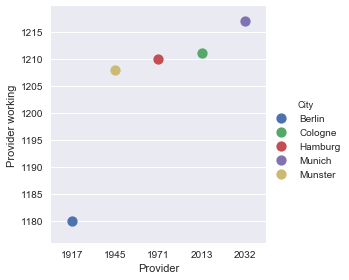

In [197]:
# change the type to int so that we could plot it later using seaborn
df_first['Provider'] = df_first['Provider'].astype(int)
df_first['Provider working'] = df_first['Provider working'].astype(int)
df_first['Total'] = df_first['Total'].astype(int)

# Finally we have all the data we need to check which city has how many providers 
# & how many of them actually got a job
# let us do a factorplot on the data frame to see where we stand

sns.factorplot('Provider', 'Provider working', hue='City', data=df_first)

#  results -  Munich tops the list with 2032 sign ups & 1215 active workers 
#  & the least active city is Berlin at the moment
#  Hamburg, Munster & Cologne are also close in terms of active workers



In [159]:
# Let us tackle the second question to check where the biggest drop is coming in provider sign ups
# Let us quickly take a look at our data set again
df_provider.head()

,provider_id,city,sign_up_date,first_call_date,went_live_date
0,0007252cf8a0fdc33b21dfa6edd065b7,Hamburg,2017-03-10 23:29:00,(missing),NaN
1,000b8c0a87c026d300aea7548fea41b3,Munich,2017-03-28 19:51:00,4/3/2017 06:07 AM,NaN
2,001457235f1ea968c33f461716e0535a,Munster,2017-02-28 09:46:00,3/1/2017 07:58 PM,3/8/2017 09:44 AM
3,001acc15a33ba3771d5f2aaf9e9c354c,Hamburg,2017-02-01 11:14:00,NaN,NaN
4,0024bbea61ac3d66ccd737be31c29422,Hamburg,2017-02-09 23:34:00,2/26/2017 12:00 AM,3/22/2017 11:14 AM


In [158]:
# Let us convert our sign_up_date column to datetime

df_provider['sign_up_date'] = pd.to_datetime(df_provider['sign_up_date'])

In [ ]:
# Let us create a new column called month which extracts the month from our sign up date

df_provider['month'] = pd.DatetimeIndex(df_provider['sign_up_date']).month

In [199]:
# let us see our new column

df_provider.head()


,provider_id,city,sign_up_date,first_call_date,went_live_date,month
0,0007252cf8a0fdc33b21dfa6edd065b7,Hamburg,2017-03-10 23:29:00,(missing),NaN,3
1,000b8c0a87c026d300aea7548fea41b3,Munich,2017-03-28 19:51:00,4/3/2017 06:07 AM,NaN,3
2,001457235f1ea968c33f461716e0535a,Munster,2017-02-28 09:46:00,3/1/2017 07:58 PM,3/8/2017 09:44 AM,2
3,001acc15a33ba3771d5f2aaf9e9c354c,Hamburg,2017-02-01 11:14:00,NaN,NaN,2
4,0024bbea61ac3d66ccd737be31c29422,Hamburg,2017-02-09 23:34:00,2/26/2017 12:00 AM,3/22/2017 11:14 AM,2


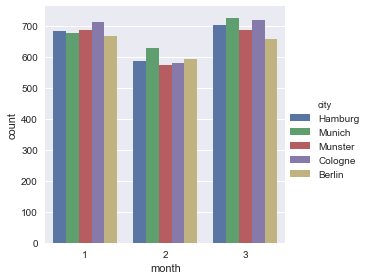

In [200]:
# Let us visualize the data to check how many providers we are getting per month per city.

sns.factorplot("month", data = df_provider, kind = 'count',hue = 'city')

# result - Feb seems to be the slowest month but also it has less days so that 
# should also be kept in mind.

In [201]:
# Let us now find more about people who signed up but did not do a job.
# we will be using our df_first data frame for it.
# Let us check the difference between provider and provider working

df_first.head()


,City,Provider,Provider working,Total
0,Berlin,1917,1180,3441
1,Cologne,2013,1211,3569
2,Hamburg,1971,1210,3567
3,Munich,2032,1217,3582
4,Munster,1945,1208,3565


In [202]:

df_first['difference'] = df_first[['Provider']].sub(df_first['Provider working'], axis=0)

In [203]:


df_first.head()



,City,Provider,Provider working,Total,difference
0,Berlin,1917,1180,3441,737
1,Cologne,2013,1211,3569,802
2,Hamburg,1971,1210,3567,761
3,Munich,2032,1217,3582,815
4,Munster,1945,1208,3565,737


In [218]:
# now let us calculate the % of people who to not work but sign up.
# Let us create a new column again called percentage.
# for this let us convert provider and difference column to int first

df_first['Provider working'] = df_first['Provider working'].astype(int)
df_first['difference'] = df_first['difference'].astype(int)

df_first['percentage'] = (df_first['difference']/df_first['Provider'])*100


In [219]:
# let us quicly take a look at our data base
df_first.head()

,City,Provider,Provider working,Total,difference,percentage
0,Berlin,1917,1180,3441,737,38.445488
1,Cologne,2013,1211,3569,802,39.841033
2,Hamburg,1971,1210,3567,761,38.609843
3,Munich,2032,1217,3582,815,40.108268
4,Munster,1945,1208,3565,737,37.892031


In [ ]:
# results - Almost all cities have more than 37% providers
# who sign up but to not work due to different reasons.
# This is definetely a big number & a bottleneck and something 
# which if streamlined can  increase the revenues significantly.
